In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sys
sys.path.append('../../')
from utils.constants import TOOLS_ORDER
from utils.dataloader import get_issues

sns.set(style='whitegrid')

issues = get_issues()

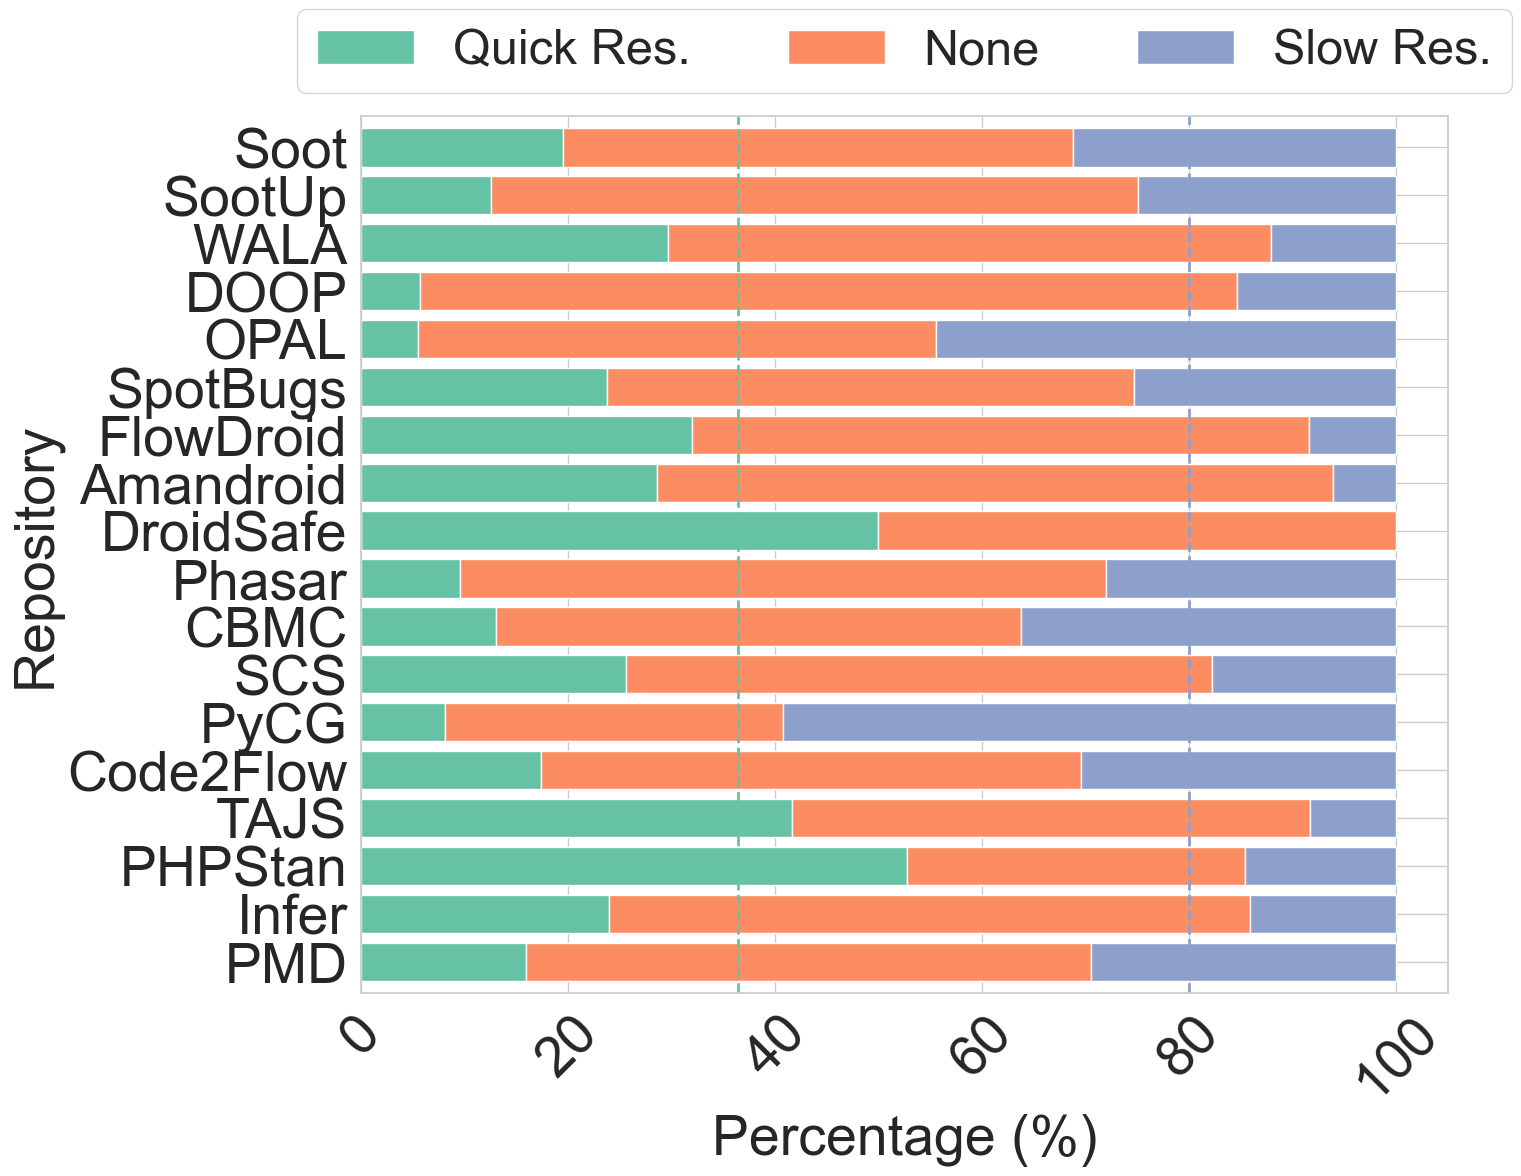

In [ ]:
# Add a stacked bar graph to show the distribution of quick fix, slow fix, and other issues in the middle state for each tool to Section 4.1, as part of the answer to RQ1.2.
resolution_df = []
for index, issue in issues.iterrows():
    if issue['prop:state'] == 'closed':
        if issue['ig:quick resolution'] == True:
            resolution_df.append({
                'repo': issue['tool_name'],
                'resolution': 'quick resolution'
            })
        elif issue['ig:slow resolution'] == True:
            resolution_df.append({
                'repo': issue['tool_name'],
                'resolution': 'slow resolution'
            })
        else:
            resolution_df.append({
                'repo': issue['tool_name'],
                'resolution': 'none'
            })

resolution_df = pd.DataFrame(resolution_df)
resolution_per_repo_df = resolution_df.groupby(['repo', 'resolution']).size().unstack(fill_value=0)
resolution_per_repo_df = resolution_per_repo_df.reindex(columns=['quick resolution', 'none', 'slow resolution'], fill_value=0)
# Convert counts to percentages for each repository
resolution_per_repo_percent = resolution_per_repo_df.div(resolution_per_repo_df.sum(axis=1), axis=0) * 100
resolution_per_repo_percent = resolution_per_repo_percent.reindex(TOOLS_ORDER[::-1])

# Replace the previous plot with the percentage plot
resolution_per_repo_percent.plot(kind='barh', stacked=True, figsize=(15, 12), color=['#66c2a5', '#fc8d62', '#8da0cb'], width=0.8)
plt.xlabel('Percentage (%)', fontsize=40)
plt.ylabel('Repository', fontsize=40)
plt.yticks(fontsize=40)
plt.xticks(fontsize=40, rotation=45)
plt.legend(['Quick Res.', 'None', 'Slow Res.'], loc='upper center', fontsize=35, bbox_to_anchor=(0.5, 1.15), ncol=3)

# blue line for quick resolution, green line for slow resolution
average_quick_resolution = issues[issues['ig:quick resolution'] == True].shape[0] / issues[issues['prop:state'] == "closed"].shape[0] * 100
average_slow_resolution = issues[issues['ig:slow resolution'] == True].shape[0] / issues[issues['prop:state'] == "closed"].shape[0] * 100
plt.axvline(x=average_quick_resolution, color='#66c2a5', linestyle='--', linewidth=2, label='Average Quick Resolution %')
plt.axvline(x=100-average_slow_resolution, color='#8da0cb', linestyle='--', linewidth=2, label='Average Slow Resolution %')

plt.tight_layout()
plt.savefig('../../../results/figures/interest_groups/resolution_per_repo.pdf', dpi=300)
plt.show()

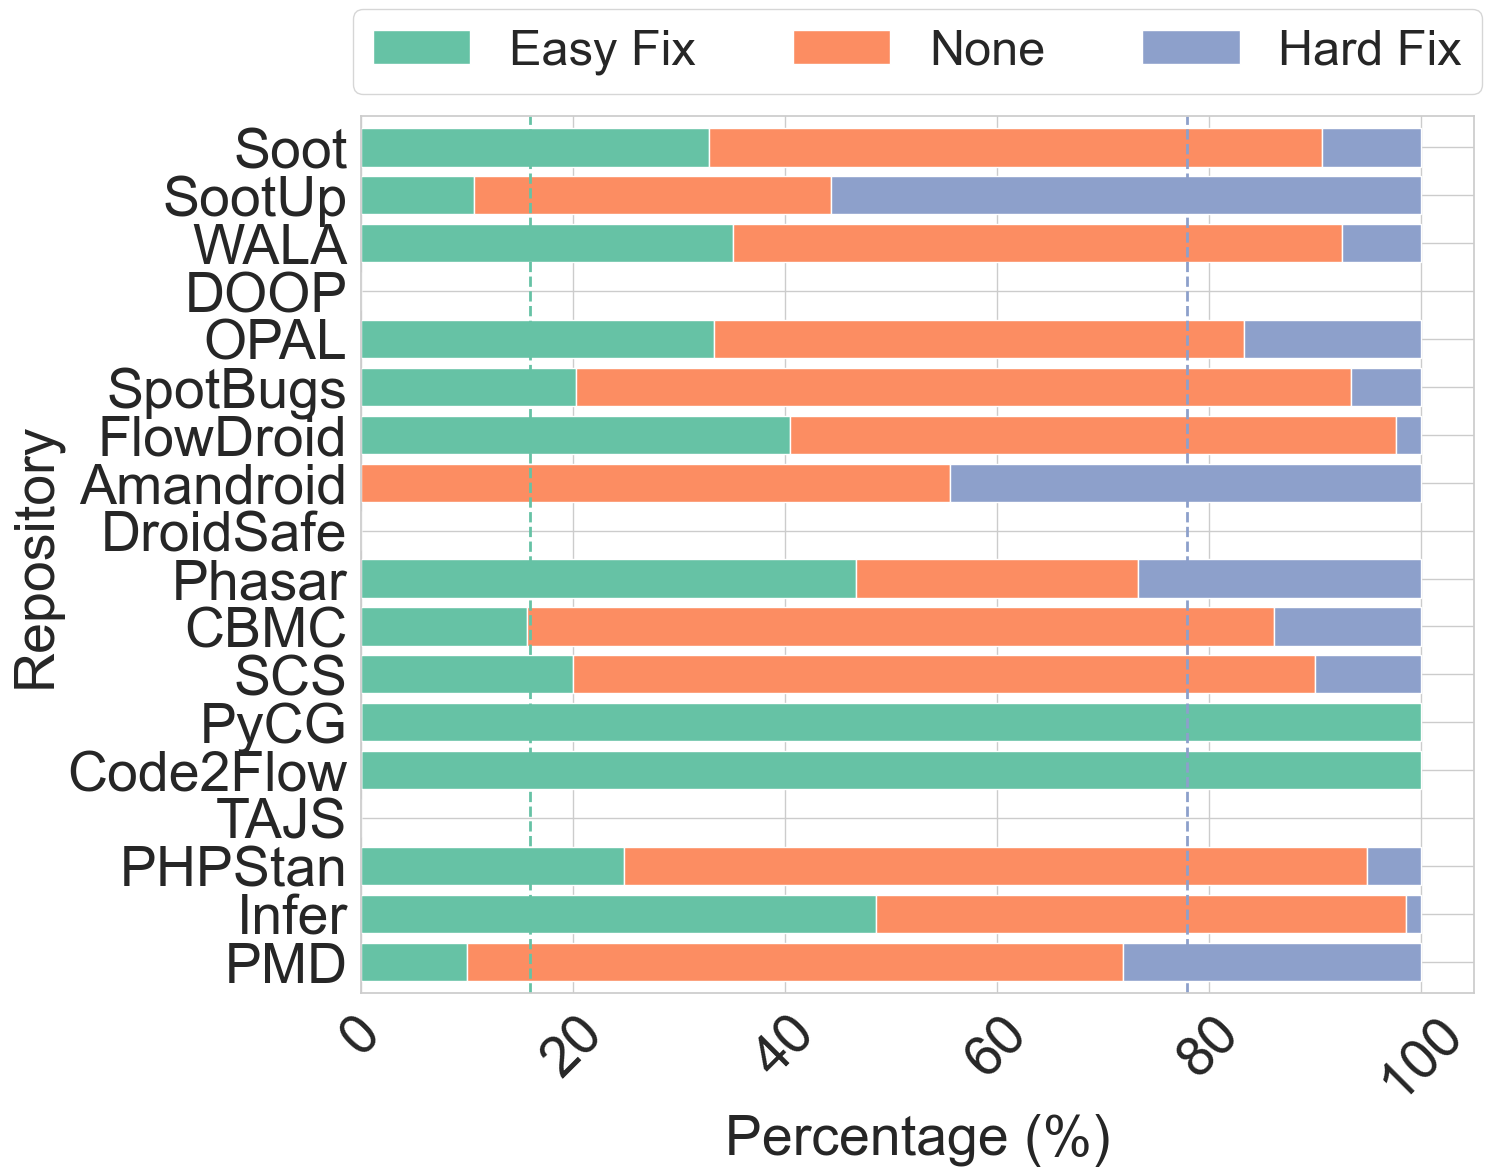

In [ ]:

# Add a stacked bar graph to show the distribution of easy fix, hard fix and other issues in the middle state for each tool to Section 4.1, as part of the answer to RQ1.2.
difficulty_df = []
for index, issue in issues.iterrows():
    if issue['prop:loc'] == 0:
        continue
    if issue['ig:easy fix'] == True:
        difficulty_df.append({
            'repo': issue['tool_name'],
            'difficulty': 'easy fix'
        })
    elif issue['ig:hard fix'] == True:
        difficulty_df.append({
            'repo': issue['tool_name'],
            'difficulty': 'hard fix'
        })
    else:
        difficulty_df.append({
            'repo': issue['tool_name'],
            'difficulty': 'none'
        })

difficulty_df = pd.DataFrame(difficulty_df)
difficulty_per_repo_df = difficulty_df.groupby(['repo', 'difficulty']).size().unstack(fill_value=0)
difficulty_per_repo_df = difficulty_per_repo_df.reindex(columns=['easy fix', 'none', 'hard fix'], fill_value=0)
difficulty_per_repo_df = difficulty_per_repo_df.reindex(TOOLS_ORDER[::-1])
# Convert counts to percentages for each repository
difficulty_per_repo_percent = difficulty_per_repo_df.div(difficulty_per_repo_df.sum(axis=1), axis=0) * 100

# Replace the previous plot with the percentage plot
difficulty_per_repo_percent.plot(kind='barh', stacked=True, figsize=(15, 12), color=['#66c2a5', '#fc8d62', '#8da0cb'], width=0.8)
plt.xlabel('Percentage (%)', fontsize=40)
plt.ylabel('Repository', fontsize=40)
plt.yticks(fontsize=40)
plt.xticks(fontsize=40, rotation=45)

plt.legend(['Easy Fix', 'None', 'Hard Fix'], loc='upper center', fontsize=35, bbox_to_anchor=(0.5, 1.15), ncol=3)

average_easy_fix = issues[issues['ig:easy fix'] == True].shape[0] / issues[issues['prop:loc'] > 0].shape[0] * 100
average_hard_fix = issues[issues['ig:hard fix'] == True].shape[0] / issues[issues['prop:loc'] > 0].shape[0] * 100

plt.axvline(x=average_easy_fix, color='#66c2a5', linestyle='--', linewidth=2, label='Average Easy Fix %')
plt.axvline(x=100-average_hard_fix, color='#8da0cb', linestyle='--', linewidth=2, label='Average Hard Fix %')

plt.tight_layout()
plt.savefig('../../../results/figures/interest_groups/difficulty_per_repo.pdf', dpi=300)
plt.show()

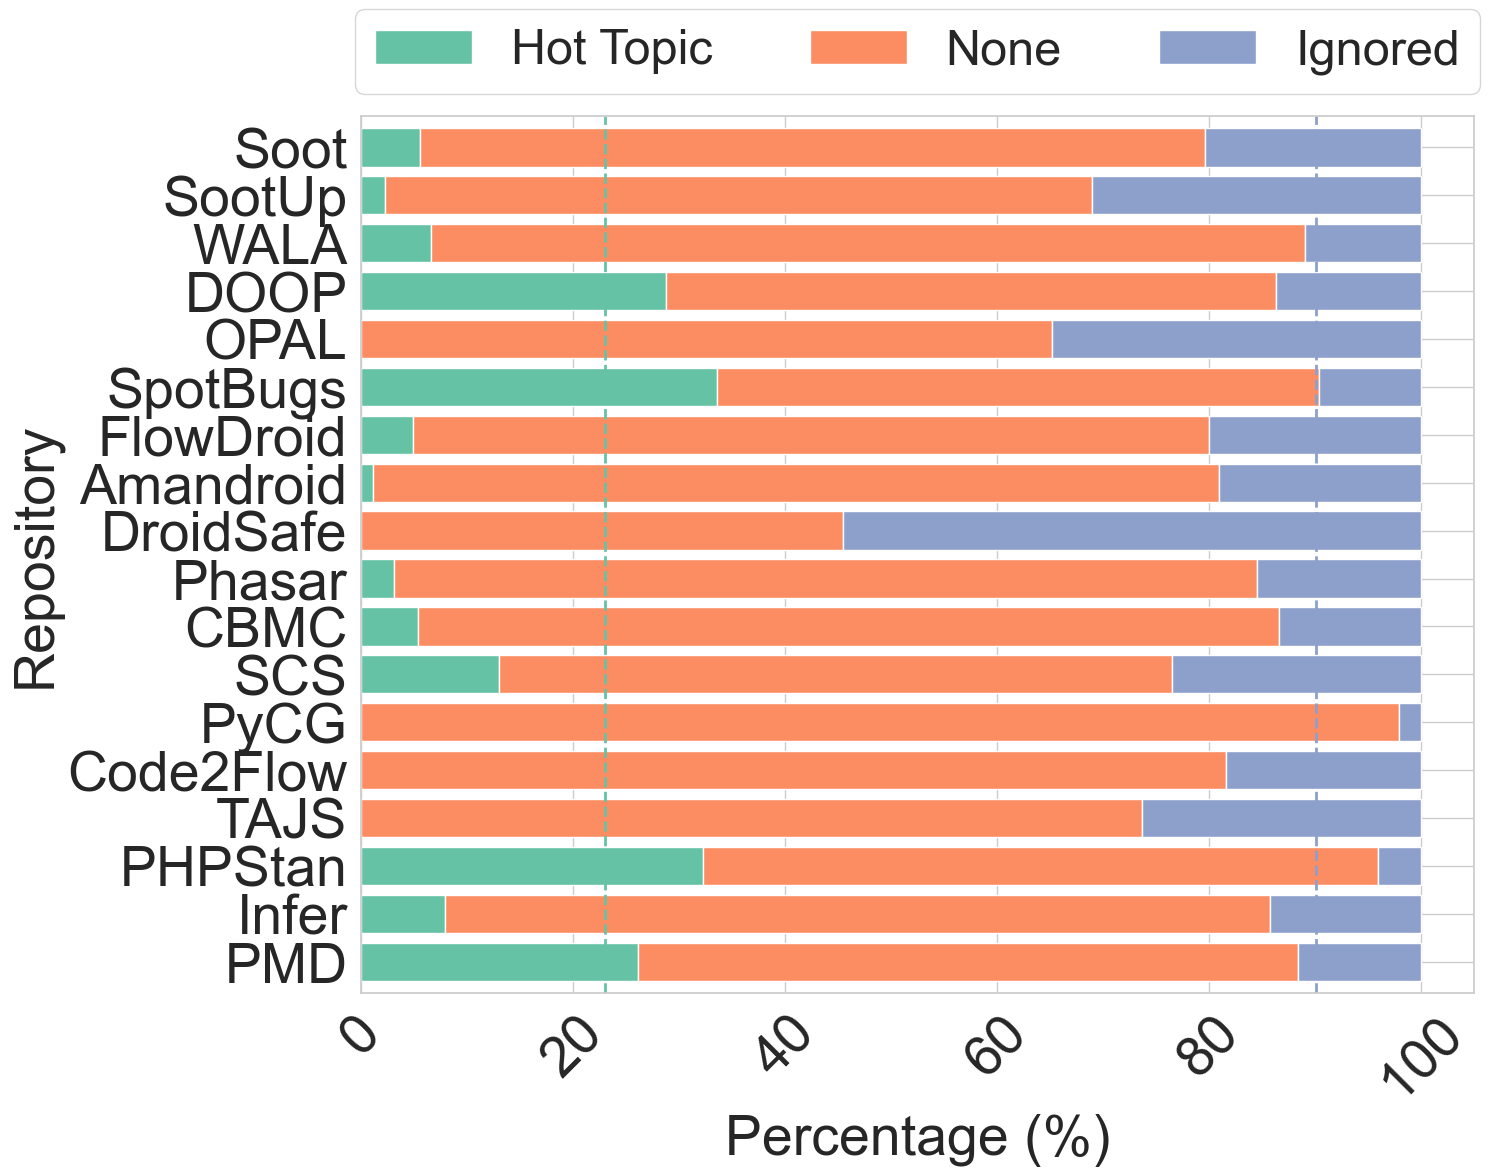

In [ ]:

# Add a stacked bar graph to show the distribution of hot topic, ignored and other issues in the middle state for each tool to Section 4.1, as part of the answer to RQ1.2.
popularity_df = []
for index, issue in issues.iterrows():
    if issue['ig:hot topic'] == True:
        popularity_df.append({
            'repo': issue['tool_name'],
            'popularity': 'hot topic'
        })
    elif issue['ig:ignored'] == True:
        popularity_df.append({
            'repo': issue['tool_name'],
            'popularity': 'ignored'
        })
    else:
        popularity_df.append({
            'repo': issue['tool_name'],
            'popularity': 'none'
        })
popularity_df = pd.DataFrame(popularity_df)
popularity_per_repo_df = popularity_df.groupby(['repo', 'popularity']).size().unstack(fill_value=0)
popularity_per_repo_df = popularity_per_repo_df.reindex(columns=['hot topic', 'none', 'ignored'], fill_value=0)
# Convert counts to percentages for each repository
popularity_per_repo_percent = popularity_per_repo_df.div(popularity_per_repo_df.sum(axis=1), axis=0) * 100
popularity_per_repo_percent = popularity_per_repo_percent.reindex(TOOLS_ORDER[::-1])
# Replace the previous plot with the percentage plot
popularity_per_repo_percent.plot(kind='barh', stacked=True, figsize=(15, 12), color=['#66c2a5', '#fc8d62', '#8da0cb'], width=0.8)
plt.xlabel('Percentage (%)', fontsize=40)
plt.ylabel('Repository', fontsize=40)
plt.yticks(fontsize=40)
plt.xticks(fontsize=40, rotation=45)

plt.legend(['Hot Topic', 'None', 'Ignored'], loc='upper center', fontsize=35, bbox_to_anchor=(0.5, 1.15), ncol=3)

average_hot_topic = issues[issues['ig:hot topic'] == True].shape[0] / issues.shape[0] * 100
average_ignored = issues[issues['ig:ignored'] == True].shape[0] / issues.shape[0] * 100

plt.axvline(x=average_hot_topic, color='#66c2a5', linestyle='--', linewidth=2, label='Average Hot Topic %')
plt.axvline(x=100-average_ignored, color='#8da0cb', linestyle='--', linewidth=2, label='Average Ignored %')

plt.tight_layout()
plt.savefig('../../../results/figures/interest_groups/popularity_per_repo.pdf', dpi=300)
plt.show()